<a href="https://colab.research.google.com/github/tamburins/ESAA-2022-/blob/main/%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **kMeans 알고리즘을 적용하여 확인적 군집분석을 수행하시오.**
>변수 설명 ) tot_price : 총구매액, buy_count : 구매횟수, 
                   visit_count : 매장방문횟수, avg_price : 평균구매액

In [41]:
#필요한 모듈 불러오기
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

## 1) 데이터 불러오기 및 탐색

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
sales = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ESAA/product_sales (1).csv")
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tot_price    150 non-null    float64
 1   visit_count  150 non-null    float64
 2   buy_count    150 non-null    float64
 3   avg_price    150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [44]:
print(sales.shape) 
print(type(sales))

(150, 4)
<class 'pandas.core.frame.DataFrame'>


## 2) KMeans 를 이용하여 3개의 군집으로 군집화

2-1) KMeans 모델을 생성하세요. 군집은 3개로 군집화하세요.

In [45]:
#모델 생성
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300)


2-2) 모델을 훈련하고 예측치 생성하고 이 결과를 pred라는 변수에 저장하세요.

In [46]:
kmeans.fit(sales)

KMeans(n_clusters=3)

In [47]:
pred = kmeans.fit_predict(sales)

In [48]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [49]:
sales['pred'] = pred

In [50]:
sales.head()

,tot_price,visit_count,buy_count,avg_price,pred
0,5.0,0.2,3.0,1.6,0
1,5.0,0.4,3.4,1.6,0
2,5.2,0.2,3.5,1.5,0
3,5.2,0.2,3.0,1.4,0
4,4.7,0.2,3.2,1.6,0


2-3) 원형 데이터(scale)에 예측치(변수명:cluster)를 추가하세요.

In [51]:
sales['cluster'] = kmeans.labels_


## 3) 군집화 시각화
: 전체 데이터를 2차원으로 축소한 뒤 시각화하세요.

3-1) cluster 변수를 제외한 sales 데이터를 salesDF라는 이름으로 변수에 저장하세요.

In [52]:
salesDF = sales.drop(['cluster'], axis=1)

In [53]:
salesDF

,tot_price,visit_count,buy_count,avg_price,pred
0,5.0,0.2,3.0,1.6,0
1,5.0,0.4,3.4,1.6,0
2,5.2,0.2,3.5,1.5,0
3,5.2,0.2,3.0,1.4,0
4,4.7,0.2,3.2,1.6,0
...,...,...,...,...,...
145,5.4,0.2,3.4,1.7,0
146,5.1,0.4,2.0,1.5,0
147,4.6,0.2,3.6,1.0,0
148,5.1,0.5,3.3,1.7,0


3-2) salesDF 데이터를 이용하여 2차원으로 차원축소 한 후 그 결과를 sales에 pca_x, pca_y 이름으로 저장하세요.

In [56]:
#차원 축소 한 후 변형된 값 임의의 변수에 저장
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(salesDF)
#sales에 'pca_x', 'pca_y' 이름으로 열 만들어 저장

sales['pca_x'] = pca_transformed[:,0]
sales['pca_y'] = pca_transformed[:,1]


3-3) pca_x를 x축, pca_y를 y축으로 하여 산점도를 그리세요. 색으로 각 점이 군집에 따라 구분되도록 하세요. (단, 각 군집별로 마커 모양 구분하지 않고 오직 색으로만 구분합니다.)

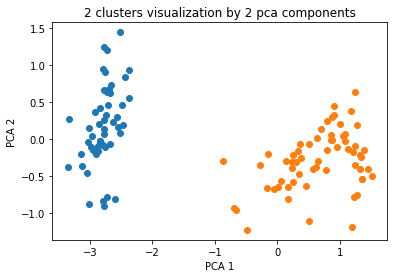

In [57]:
#군집값이이 0,1,2인인 경우마다다 별도의의 인덱스로로 추출출
marker0_ind = sales[sales['cluster']==0].index
marker1_ind = sales[sales['cluster']==1].index

#군집값값 0,1,2에에 해당하는는 인덱스로로 각각 군집집 레벨의의 pca_x, pca_yr값값 추출출, o,s,^로로 마커표시시
plt.scatter(x=sales.loc[marker0_ind, 'pca_x'], y=sales.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=sales.loc[marker1_ind, 'pca_x'], y=sales.loc[marker1_ind, 'pca_y'], marker='o')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('2 clusters visualization by 2 pca components')
plt.show()

## 4) 군집평가: 실루엣 계수 구하기

In [58]:
#시각화를 위하여 사용했던 차원 축소 관련 계수 삭제
sales=sales.drop(['pca_x','pca_y'], axis=1)

#cluster 행을 제외한 순수 데이터 sales_data로 저장
sales_data=sales.drop('cluster', axis=1)

4-1) sales의 모든 데이터에 실루엣 계수를 구하고 실루엣 계수 칼럼을 추가하세요.

In [61]:
#sales의 모든 데이터에 실루엣 계수 구하기
score_samples = silhouette_samples(sales, sales['cluster'])

In [62]:
#sales에 실루엣 계수 칼럼 추가
sales['silhouette_coeff']=score_samples

4-2) 모든 데이터의 평균 실루엣 계수를 구하세요.

In [65]:
#모든 데이터의 평균 실루엣 계수 값을 구하기
average_score = silhouette_score(sales, sales['cluster'])
print('data set silhouette analysis score: {0:.3f}'.format(average_score))


data set silhouette analysis score: 0.634


4-3) 군집별 평균 실루엣 계수를 구하세요.

In [73]:
sales.groupby('cluster')['silhouette_coeff'].mean()


cluster
0    0.774124
1    0.559141
2    0.580827
Name: silhouette_coeff, dtype: float64